In [2]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
scipy: 1.0.0
numpy: 1.14.0
matplotlib: 2.1.2
pandas: 0.22.0
sklearn: 0.19.1


In [3]:
import pandas as pd 
import numpy as np
from numpy import median
from scipy.stats import spearmanr
from pandas import DataFrame as df
# from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from ipykernel import kernelapp as app
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
import seaborn as sns

%matplotlib inline

In [4]:
data = pd.read_csv("WineReview.csv", index_col=0)
print(data.describe().transpose())
print(data.info())

           count       mean        std   min   25%   50%   75%     max
points  129971.0  88.447138   3.039730  80.0  86.0  88.0  91.0   100.0
price   120975.0  35.363389  41.022218   4.0  17.0  25.0  42.0  3300.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 

In [5]:
data1= data.drop('title', axis =1)
data1.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Pinot Noir,Sweet Cheeks


In [6]:
data1.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
variety                      1
winery                       0
dtype: int64

In [7]:
data1.shape

(129971, 12)

In [8]:
data2 = data1[data1["country"].notnull() & data1["province"].notnull() & data1["variety"].notnull()]
data2.shape
data2.isnull().sum()

country                      0
description                  0
designation              37453
points                       0
price                     8992
province                     0
region_1                 21183
region_2                 79396
taster_name              26243
taster_twitter_handle    31212
variety                      0
winery                       0
dtype: int64

####tip: 
1. I drop missing values in columns "country", "province" and "variety" as missing values in each of these columns are less than 1300, which also means the percent of missing values is less than one percent of the whole records.
2. From description we can see there are nearly 9000 field missing values in columns "price". 

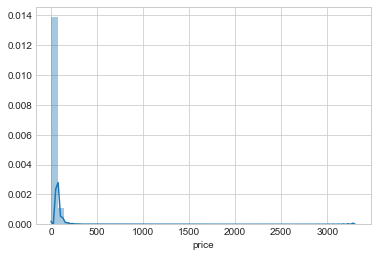

In [10]:
sns.set_style('whitegrid')
sns.distplot(data2[data2['price'].notnull()]['price'])

In [11]:
data2['price'].describe()

count    120915.000000
mean         35.368796
std          41.031188
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [12]:
data2['price'].mode()

0    20.0
dtype: float64

In [13]:
median_price=data2['price'].median()
data2['price']=data2['price'].fillna(median_price)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


####tips: 
By visualize "price" in distribution plot and compare mean, median and mode value (mean is 35 and median is 25, which suggests a heavily skewed dataset with some outlier observations influencing the mean of the distribution), we fill the unavailable values with the median of the distribution.  

In [14]:
data2.isnull().sum()

country                      0
description                  0
designation              37453
points                       0
price                        0
province                     0
region_1                 21183
region_2                 79396
taster_name              26243
taster_twitter_handle    31212
variety                      0
winery                       0
dtype: int64

In [15]:
data2['price'].describe()

count    129907.000000
mean         34.651081
std          39.673045
min           4.000000
25%          18.000000
50%          25.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64

####tips: 
As can be seen above, the interpolation has not significantly altered the summary statistics of the distribution.

In [16]:
taster_cols = ['taster_name','taster_twitter_handle']
for column in taster_cols:
    data2[column] = pandas.factorize(data2[column])[0]
data2.head(5)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,25.0,Sicily & Sardinia,Etna,NaN,0,0,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,1,1,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,2,2,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,3,-1,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,2,2,Pinot Noir,Sweet Cheeks


In [17]:
data = data2[['taster_name','taster_twitter_handle']]
correlation = data.corr(method='pearson')
print(correlation)

                       taster_name  taster_twitter_handle
taster_name               1.000000               0.944363
taster_twitter_handle     0.944363               1.000000


####tips: from the above correlation we can find these two features are highly related. What's more, under common sense we know feature 'taster_twitter_handle' is feature 'taster_name' twitter accounts, so I'm going to drop one feature of these two.

In [18]:
data2 = data2.drop('taster_twitter_handle', axis=1)
data2.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,25.0,Sicily & Sardinia,Etna,NaN,0,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,1,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,2,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,3,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,2,Pinot Noir,Sweet Cheeks


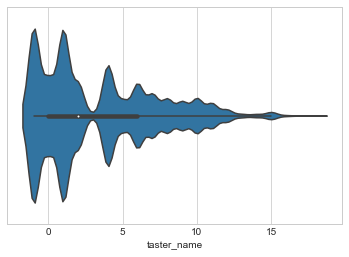

In [19]:
sns.violinplot(x=data2['taster_name'])

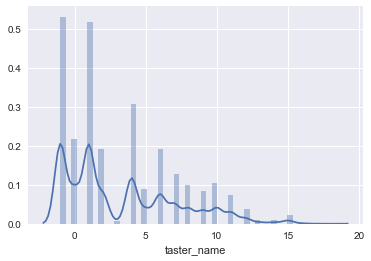

In [32]:
sns.distplot(data2[data2['taster_name'].notnull()]['taster_name'])

In [20]:
data2['taster_name'].value_counts()

-1     26243
 1     25512
 4     15127
 0     10776
 6      9537
 2      9531
 7      6332
 10     5145
 8      4966
 5      4415
 9      4177
 11     3676
 12     1832
 15     1080
 13      502
 14      469
 3       415
 16      139
 17       27
 18        6
Name: taster_name, dtype: int64